In [23]:
#Learn Code from 
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#Author: Jason Brownlee

#import library
import pandas as pd
import numpy as np
import math
import utils
from matplotlib import pyplot as plt

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [62]:
df_data_set = pd.read_csv('Data/shcmp multi variable before.csv')
df_data_set.set_index('Date',inplace=True)
df_data_set.head(5)
len(df_data_set)

4410

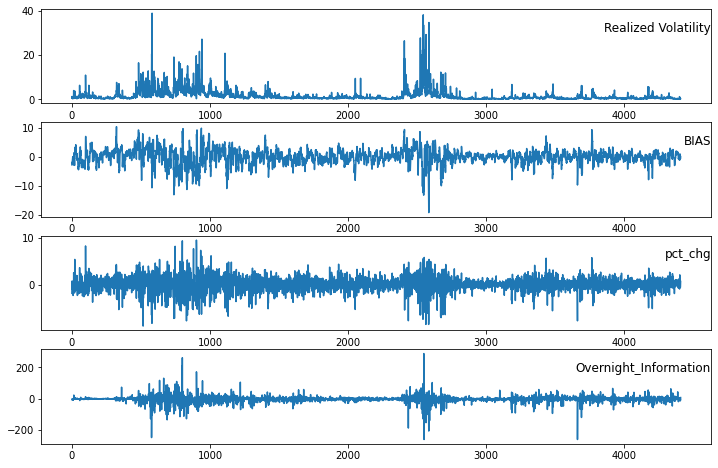

In [63]:
# plot each column
Variables = df_data_set.columns
plt.figure(figsize=(12,8))
for group in range(len(Variables)):
 plt.subplot(len(Variables), 1, group+1)
 plt.plot(df_data_set.values[:, group])
 plt.title(df_data_set.columns[group], y=0.7, loc='right')
plt.show()

In [64]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [65]:
#Set Windows size here
WINDOWS_SIZE = 20
X,y = df_to_X_y3(df_data_set, window_size = WINDOWS_SIZE)

X.shape,y.shape

((4390, 20, 4), (4390,))

In [66]:
#Convert the data into training set, validation set and test set
#The number percentage of each set is 80%, 10% and 10%

#OR CUSTOMIZE YOUR PERCENTAGE OF EACH SET HERE
TRAINING_DATA_LEN = math.ceil(len(X)*0.8)
VALIDATION_LEN = math.ceil(len(X)*0.9)

X_train, y_train, X_val, y_val, X_test, y_test = utils.split_to_training_val_test(X,y,\
    training_len=TRAINING_DATA_LEN, val_len=VALIDATION_LEN)

#check size of each set
X_train.shape, X_test.shape, X_val.shape,y_test.shape,y_train.shape,y_test.shape

((3512, 20, 4), (439, 20, 4), (439, 20, 4), (439,), (3512,), (439,))

In [67]:
#built model_multi for multi variate LSTM
model_multi = Sequential()
model_multi.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model_multi.add(LSTM(64,dropout=0.2))
model_multi.add(Dense(1, 'linear'))

model_multi.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [68]:
cp = ModelCheckpoint('model_multi_before/', save_best_only=True)
model_multi.compile(loss=MeanSquaredError(), \
              optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [69]:
#Set Epoch here
EPOCH = 30

#Start to train model
history = model_multi.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp])

Epoch 1/30
110/110 [==============================] - 5s 15ms/step - loss: 5.3611 - root_mean_squared_error: 2.3154 - val_loss: 0.4961 - val_root_mean_squared_error: 0.7043


INFO:tensorflow:Assets written to: model_multi_before\assets


INFO:tensorflow:Assets written to: model_multi_before\assets


Epoch 2/30
110/110 [==============================] - 1s 13ms/step - loss: 4.6543 - root_mean_squared_error: 2.1574 - val_loss: 0.5450 - val_root_mean_squared_error: 0.7382
Epoch 3/30
110/110 [==============================] - 1s 12ms/step - loss: 4.4229 - root_mean_squared_error: 2.1031 - val_loss: 0.6119 - val_root_mean_squared_error: 0.7822
Epoch 4/30
110/110 [==============================] - 1s 12ms/step - loss: 4.4310 - root_mean_squared_error: 2.1050 - val_loss: 0.7258 - val_root_mean_squared_error: 0.8520
Epoch 5/30
110/110 [==============================] - 1s 12ms/step - loss: 3.9747 - root_mean_squared_error: 1.9937 - val_loss: 0.4767 - val_root_mean_squared_error: 0.6904


INFO:tensorflow:Assets written to: model_multi_before\assets


INFO:tensorflow:Assets written to: model_multi_before\assets


Epoch 6/30
110/110 [==============================] - 1s 12ms/step - loss: 4.2453 - root_mean_squared_error: 2.0604 - val_loss: 0.7024 - val_root_mean_squared_error: 0.8381
Epoch 7/30
110/110 [==============================] - 1s 12ms/step - loss: 4.1232 - root_mean_squared_error: 2.0306 - val_loss: 0.5171 - val_root_mean_squared_error: 0.7191
Epoch 8/30
110/110 [==============================] - 1s 11ms/step - loss: 3.6906 - root_mean_squared_error: 1.9211 - val_loss: 0.4975 - val_root_mean_squared_error: 0.7053
Epoch 9/30
110/110 [==============================] - 1s 11ms/step - loss: 4.0220 - root_mean_squared_error: 2.0055 - val_loss: 0.4222 - val_root_mean_squared_error: 0.6498


INFO:tensorflow:Assets written to: model_multi_before\assets


INFO:tensorflow:Assets written to: model_multi_before\assets


Epoch 10/30
110/110 [==============================] - 1s 13ms/step - loss: 3.9802 - root_mean_squared_error: 1.9950 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7060
Epoch 11/30
110/110 [==============================] - 1s 12ms/step - loss: 3.7924 - root_mean_squared_error: 1.9474 - val_loss: 0.6991 - val_root_mean_squared_error: 0.8361
Epoch 12/30
110/110 [==============================] - 1s 13ms/step - loss: 3.7898 - root_mean_squared_error: 1.9467 - val_loss: 0.4846 - val_root_mean_squared_error: 0.6961
Epoch 13/30
110/110 [==============================] - 1s 13ms/step - loss: 3.7648 - root_mean_squared_error: 1.9403 - val_loss: 0.3930 - val_root_mean_squared_error: 0.6269


INFO:tensorflow:Assets written to: model_multi_before\assets


INFO:tensorflow:Assets written to: model_multi_before\assets


Epoch 14/30
110/110 [==============================] - 2s 17ms/step - loss: 3.8688 - root_mean_squared_error: 1.9669 - val_loss: 0.3486 - val_root_mean_squared_error: 0.5905


INFO:tensorflow:Assets written to: model_multi_before\assets


INFO:tensorflow:Assets written to: model_multi_before\assets


Epoch 15/30
110/110 [==============================] - 2s 17ms/step - loss: 3.4910 - root_mean_squared_error: 1.8684 - val_loss: 0.4719 - val_root_mean_squared_error: 0.6870
Epoch 16/30
110/110 [==============================] - 2s 14ms/step - loss: 3.7671 - root_mean_squared_error: 1.9409 - val_loss: 0.5366 - val_root_mean_squared_error: 0.7325
Epoch 17/30
110/110 [==============================] - 2s 14ms/step - loss: 3.5814 - root_mean_squared_error: 1.8925 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7479
Epoch 18/30
110/110 [==============================] - 2s 14ms/step - loss: 3.4925 - root_mean_squared_error: 1.8688 - val_loss: 0.4902 - val_root_mean_squared_error: 0.7001
Epoch 19/30
110/110 [==============================] - 2s 15ms/step - loss: 3.1688 - root_mean_squared_error: 1.7801 - val_loss: 0.5864 - val_root_mean_squared_error: 0.7657
Epoch 20/30
110/110 [==============================] - 2s 15ms/step - loss: 3.1880 - root_mean_squared_error: 1.7855 - val_loss: 0

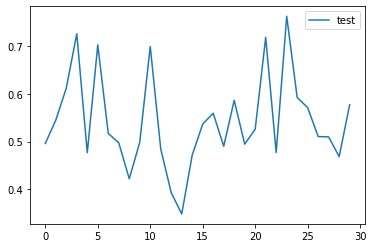

In [70]:
# plot history
#plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [71]:
from tensorflow.keras.models import load_model
#check result for training set
model1 = load_model('model_multi_before/')
train_predictions = model1.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})

In [72]:
train_results = pd.read_csv('Data/date.csv')
train_results['Date'] = pd.to_datetime(train_results['Date'])
train_results.set_index('Date',inplace=True)

train_results['Train Predictions'] = train_predictions

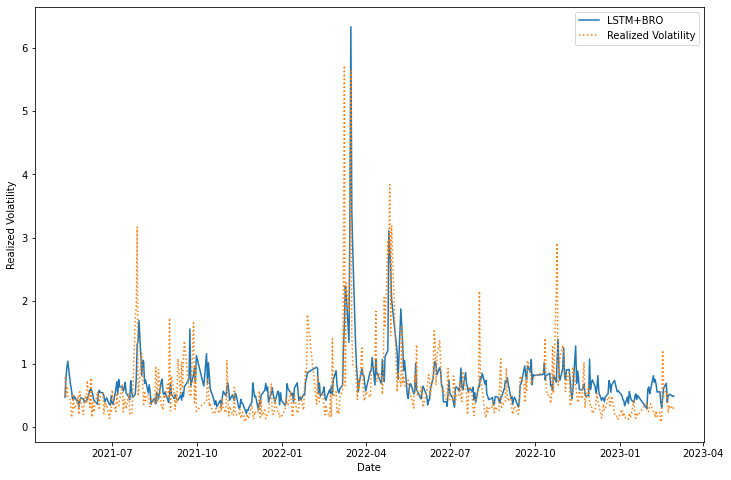

In [75]:
plt.figure(figsize=(12,8))
plt.plot(train_results['Train Predictions'], label='LSTM+BRO')
plt.plot(train_results['Realized Volatility'], label='Realized Volatility',linestyle=':')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()

In [74]:
Predictions_val = train_results['Train Predictions']
Actual_val = train_results['Realized Volatility']

utils.Predictions_Error(Predictions_val,Actual_val)

MAE =  0.30662568496370923
MSE =  0.2173285110590233
RMSE =  0.46618506095650825
R_2 =  0.4145898055795616
RMSPE =  1.0639779825473163
MSLE =  0.04971784018958743


MAE =  0.30221074598776043
MSE =  0.2546077265064707
RMSE =  0.5045866887923924
R_2 =  0.3123796859147281
RMSPE =  0.9269844040011631
MSLE =  0.04782273607008992